In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../results/exp_matrix.csv")

df.head()


,scenario,intensity,model,strategy,MAE,RMSE,updates,avg_update_ms,reaction_delay_batches
0,abrupt,weak,sgd,static,4.867156e-01,5.323803e-01,0,0.00000,NaN
1,abrupt,weak,sgd,periodic_k5,3.279429e-01,3.727000e-01,4,1.32040,4.0
2,abrupt,weak,sgd,drift_error_plastic,5.479850e-01,5.830672e-01,6,0.34465,0.0
3,abrupt,weak,sgd,drift_error_stable,7.268425e+10,7.282992e+10,2,0.42040,9.0
4,abrupt,weak,ridge,static,4.455012e-01,4.888732e-01,0,0.00000,NaN


In [4]:
# аккуратно приведём названия столбцов
df.columns = [
    "scenario",
    "intensity",
    "model",
    "strategy",
    "MAE",
    "RMSE",
    "updates",
    "avg_update_ms",
    "reaction_delay_batches",
]

# проверим размеры и типы
df.shape, df.dtypes


((144, 9),
 scenario                   object
 intensity                  object
 model                      object
 strategy                   object
 MAE                       float64
 RMSE                      float64
 updates                     int64
 avg_update_ms             float64
 reaction_delay_batches    float64
 dtype: object)

In [5]:
df.describe()


,MAE,RMSE,updates,avg_update_ms,reaction_delay_batches
count,1.440000e+02,1.440000e+02,144.000000,144.000000,98.000000
mean,1.582005e+09,1.584929e+09,3.131944,47.999077,4.020408
std,1.088333e+10,1.090330e+10,2.591666,70.687191,4.364760
min,1.415098e-01,1.599723e-01,0.000000,0.000000,0.000000
25%,3.317122e-01,3.718147e-01,0.750000,0.258487,1.000000
50%,4.535354e-01,4.867959e-01,3.500000,1.004920,3.000000
75%,5.375972e-01,5.837137e-01,5.000000,88.031472,5.000000
max,8.305731e+10,8.318421e+10,8.000000,275.377775,16.000000


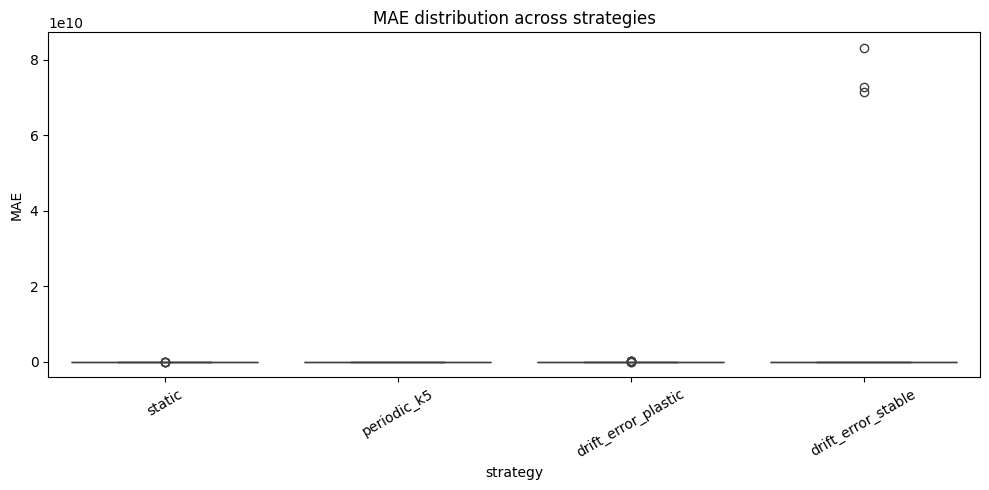

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="strategy",
    y="MAE",
)
plt.title("MAE distribution across strategies")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


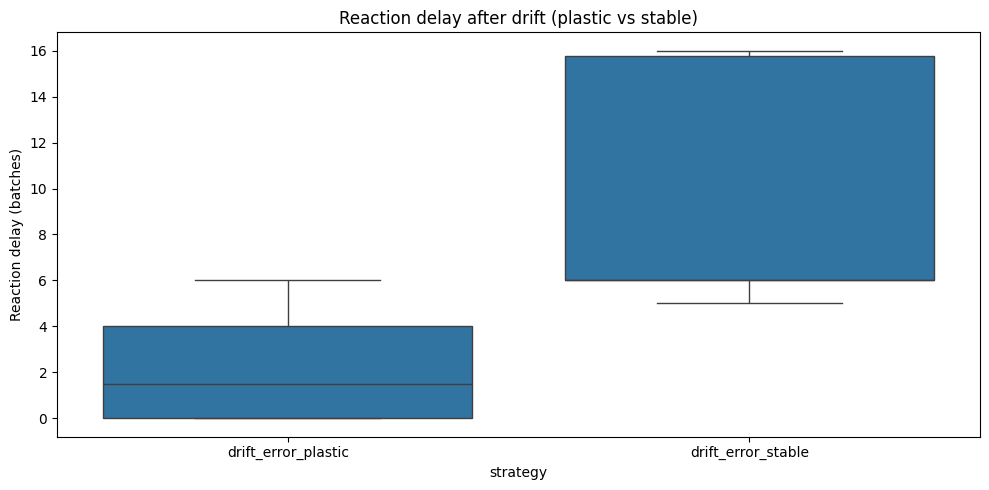

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[df["strategy"].str.contains("drift_error")],
    x="strategy",
    y="reaction_delay_batches",
)
plt.title("Reaction delay after drift (plastic vs stable)")
plt.ylabel("Reaction delay (batches)")
plt.tight_layout()
plt.show()
